In [19]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
import os
from PIL import Image
from torchvision import transforms
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
class Thyroid_Dataset(Dataset):
    def __init__(self, csv_file, transform=None):
        """
        image_dir: str, path to image folder
        labels_dict: dict, filename (str) -> label (int)
        transform: torchvision transform or custom transform
        """
        self.csv_file = csv_file
        self.data_path = "../data"
        self.df = pd.read_csv(f"{self.data_path}/{self.csv_file}")
        self.transform = transform
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        ID = self.df["ID"][idx]
        dataset = self.df["dataset"][idx]

        if dataset == "DDTI":
            image_path = self.data_path+f"/DDTI dataset/DDTI/2_preprocessed_data/stage_2/p_image/{ID}.png"
            mask_path = self.data_path+f"/DDTI dataset/DDTI/2_preprocessed_data/stage_2/p_mask/{ID}.png"
        elif dataset == "TG3K":
            image_path = self.data_path+f"/tg3k/thyroid-image/{ID}.jpg"
            mask_path = self.data_path+f"/tg3k/thyroid-mask/{ID}.jpg"
        elif dataset == "TN3K":
            ID = str(ID).zfill(4)
            image_path = self.data_path+f"/tn3k/trainval-image/{ID}.jpg"
            mask_path = self.data_path+f"/tn3k/trainval-mask/{ID}.jpg"

        image = Image.open(image_path).convert("L")
        mask = Image.open(mask_path).convert("L")

        image_tensor = self.transform(image)
        mask_tensor = self.transform(mask)

            
        return image_tensor, mask_tensor

In [24]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])


In [25]:
train_dataset = Thyroid_Dataset("train.csv", transform = transform)

In [26]:
train_dataloader = DataLoader(train_dataset, batch_size = 8)

In [27]:
image, mask = next(iter(train_dataloader))

In [28]:
image.shape


torch.Size([8, 1, 256, 256])

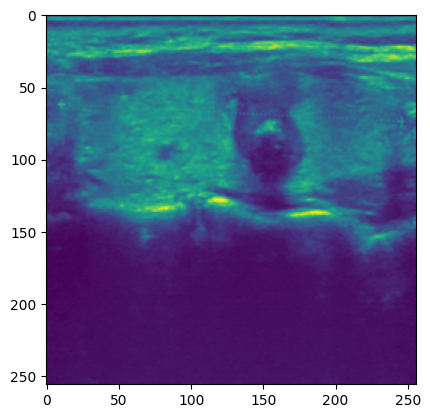

In [29]:
show_image = image[0]
to_pil = transforms.ToPILImage()
pil_image = to_pil(show_image)

plt.imshow(pil_image)

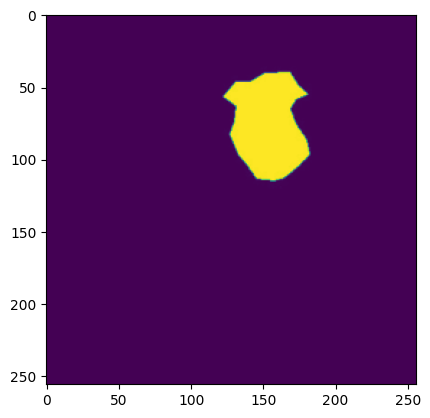

In [30]:
show_mask = mask[0]
to_pil = transforms.ToPILImage()
pil_mask = to_pil(show_mask)

plt.imshow(pil_mask)